### Look at first run results

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import tqdm
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.constants import region_names, deg_string, gkg_string, region_points
from nemo_python_git.projects import testing, evaluation, overshoots
from nemo_python_git.plots import timeseries_by_region, timeseries_plot, circumpolar_plot, finished_plot
from nemo_python_git.plot_utils import set_colours
from matplotlib.lines import Line2D
import imageio
import glob
import cmocean

In [2]:
import datetime as dt 

In [3]:
dt.datetime(1800, 1, 1, 00, 00) + dt.timedelta(seconds=5651337600)

datetime.datetime(1979, 2, 1, 0, 0)

In [4]:
import seaborn as sns

Check drift in near-bottom temperature and salinity by region:

Processing amundsen_sea
Processing bellingshausen_sea
Processing larsen
Processing filchner_ronne
Processing east_antarctica
Processing amery
Processing ross


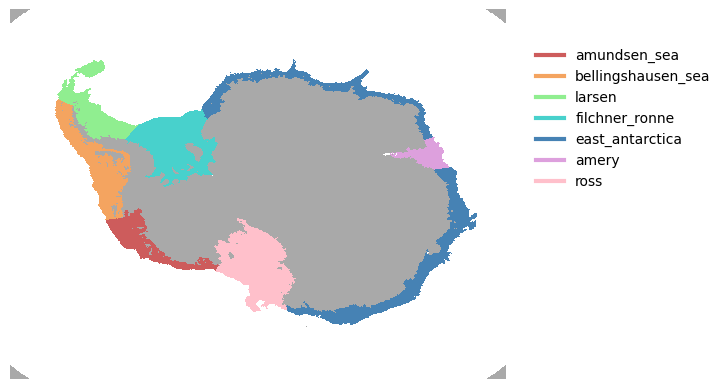

In [2]:
testing.plot_region_map(file_path='/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/bathymetry/domain_cfg-20240123-filledlakes.nc', 
                        option='all', fig_name=None, halo=False, legend=True)

In [3]:
# load regions file
regions_file = xr.open_dataset('/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/regions_all.nc')

# load timeseries
ts = xr.open_dataset('/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/allon-1980/timeseries.nc')

In [4]:
regions   = ['amundsen_sea', 'bellingshausen_sea', 'larsen', 'filchner_ronne', 'amery', 'ross', 'all']
colours   = ['IndianRed', 'SandyBrown', 'LightGreen', 'MediumTurquoise', 'Plum', 'Pink', 'gray']
var_names = ['bwtemp', 'bwsalt', 'cavity_temp', 'cavity_salt', 'shelf_temp', 'shelf_salt', 'draft']

In [5]:
year = 1980
run_folder = '/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/allon-1980/'
nemo_mesh  = xr.open_dataset('/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/bathymetry/mesh_mask-20240123-filledlakes.nc')

Look at sea surface height over the full time period

In [2]:
# Function to create mp4 animation from image files
# Input:
# filenames: list of strings of image filenames to create animation from (in sorted order)
# out_file: string of name and path for animation
def create_animation(filenames, out_file='test.mp4'):
    import imageio
    
    # filenames is a list of the names/locations of image files to combine into animation (mp4 in this case)
    with imageio.get_writer(f'{out_file}', fps=2, mode='I') as writer: 
        for filename in filenames:  
            image = imageio.imread(filename)  
            writer.append_data(image)
    return

In [8]:
run = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/old/NEMO-test3-20230914/eANT025.L121_1m_19790101_19791231_grid_T.nc') 

In [126]:
for month in range(1,13):
    bdyn = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/boundary-conditions/B-SOSE/SOSE-SSH-boundary-conditions-20240125_m{month:02}.nc')
    bdyn['ETAN'] = abs(bdyn['ETAN']*0) + 1
    bdyn.to_netcdf(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/boundary-conditions/SSH-boundary-conditions-ones_m{month:02}.nc')

In [16]:
run1 = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/SSH_1/eANT025.L121_1m_19790101_19791231_grid_T.nc') 
run2 = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/ERA5_1979_2015/eANT025.L121_1m_19790101_19791231_grid_T.nc') 

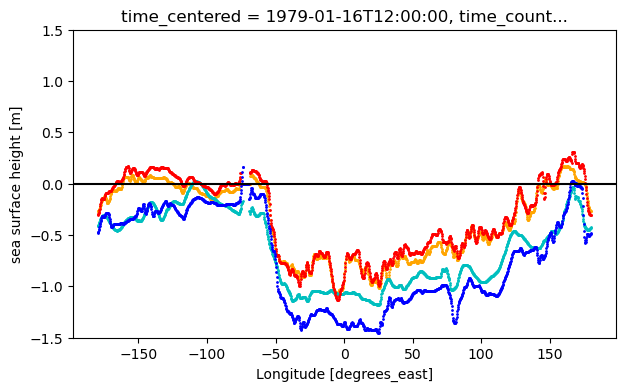

In [3]:
month=1
fig, ax = plt.subplots(1,1, figsize=(7,4))
plt.axhline(y=0, color='k')
bdy_new = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/boundary-conditions/B-SOSE/SOSE-SSH-boundary-conditions-20240228_m{month:02}.nc')
bdy_old = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/boundary-conditions/bdyT_tra_y1979.nc')
bdy_new.ETAN.isel(time_counter=0).plot.scatter(ylim=(-1.5,1.5), ax=ax, edgecolors='orange', s=1, c='orange')
bdy_old.sossh.isel(time_counter=0).plot.scatter(x='nav_lon', ylim=(-1.5, 1.5), ax=ax, edgecolors='c', s=1, c='c')

run1 = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/BDY_1/eANT025.L121_1m_19840101_19841231_grid_T.nc') 
run1.zos.isel(time_counter=0, y_grid_T=451).plot.scatter(ax=ax, x='nav_lon_grid_T', edgecolors='red', s=1, c='red')

run2 = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/old/NEMO-test3-20230914/eANT025.L121_1m_19790101_19791231_grid_T.nc') 
run2.zos.isel(time_counter=0, y_grid_T=437).plot.scatter(ax=ax, x='nav_lon_grid_T', edgecolors='b', s=1, c='b')

In [22]:
for year in range(1979,2015):
    with xr.open_dataset(f'{run_folder}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc') as ds:
        for month in range(1,13):
            fig, ax = plt.subplots(1,1, figsize=(20,5))
            ds.zos.isel(time_counter=month-1, y_grid_T=slice(350,453)).plot(ax=ax, vmin=-20, vmax=20, cmap=cmocean.cm.balance)
            ax.set_title(f'{year}-{month:02}')
            fig.savefig(f'{run_folder}/temp/SSH_south_america_y{year}m{month:02}.jpg', bbox_inches='tight')
            plt.close()

In [23]:
filenames =np.sort(glob.glob(f'{run_folder}temp/SSH_south_america_y????m??.jpg'))
create_animation(filenames, out_file=f'{run_folder}SSH_south_america.mp4')

/tmp/ipykernel_529/3587280536.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1471, 468) to (1472, 480) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x67f0d00] Warning: data is not aligned! This can lead to a speed loss


In [ ]:
for year in range(1979,2015):
    with xr.open_dataset(f'{run_folder}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc') as ds:
        for month in range(1,13):
            fig, ax = plt.subplots(1,1, figsize=(20,5))
            ds.zos.isel(time_counter=month-1).plot(ax=ax, vmin=-10, vmax=10, cmap=cmocean.cm.balance)
            ax.set_title(f'{year}-{month:02}')
            fig.savefig(f'{run_folder}/temp/SSH_full_domain_y{year}m{month:02}.jpg', bbox_inches='tight')
            plt.close()

In [ ]:
filenames =np.sort(glob.glob(f'{run_folder}temp/SSH_full_domain_y????m??.jpg'))
create_animation(filenames, out_file=f'{run_folder}SSH_full_domain.mp4')

Look at impact of the different sea ice tuning runs:

In [9]:
base_folder = '/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/'
EXP         = ['EXP_tune03','EXP_tune04','EXP_tune05','EXP_tune06','EXP_tune07','EXP_tune08','EXP_tune09']

In [17]:
def calc_hovmoeller(var, region, run_folder=run_folder, nemo_mesh=nemo_mesh):
    i=0
    nemo_mesh_subset = nemo_mesh.rename({'x':'x_grid_T','y':'y_grid_T','nav_lev':'deptht'}).isel(x_grid_T=region['x'], y_grid_T=region['y'])
    for year in range(1984,1987): #tqdm.tqdm(range(1979,1987)):
        with xr.open_dataset(f'{run_folder}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc').isel(x_grid_T=region['x'], y_grid_T=region['y']) as ds:
            var_ocean  = xr.where(nemo_mesh_subset.tmask.isel(time_counter=0)==0, np.nan, ds[var]) 
            area_ocean = xr.where(nemo_mesh_subset.tmask.isel(time_counter=0)==0, np.nan, ds['area_grid_T']) 
            var_ds     = (var_ocean*area_ocean).sum(dim=['x_grid_T','y_grid_T'])/(area_ocean.sum(dim=['x_grid_T','y_grid_T']))
            if i==0:
                convect_ts = var_ds
            else:
                convect_ts = xr.concat([convect_ts, var_ds], dim='time_counter')
        
        i+=1
    return convect_ts

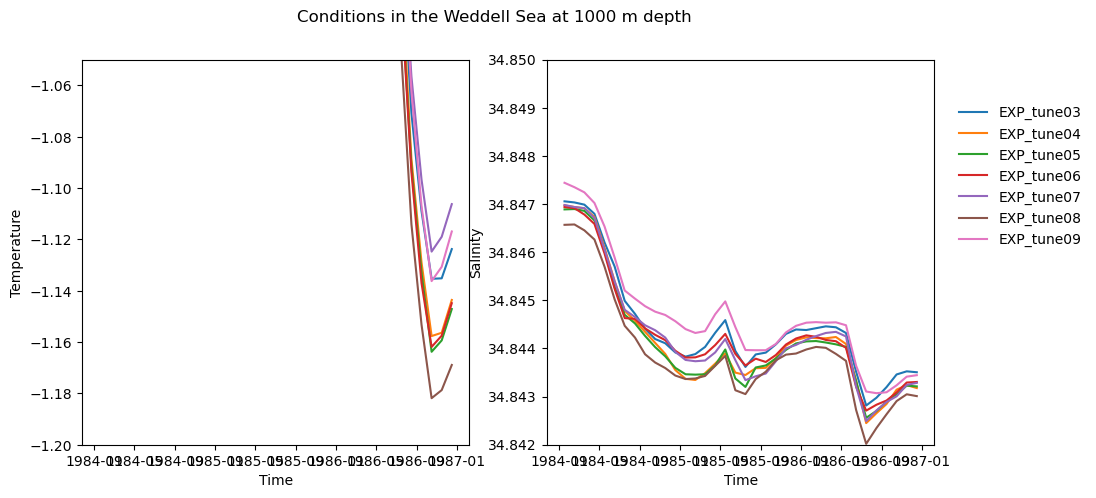

In [18]:
fig, ax = plt.subplots(1,2, figsize=(11,5))

for axis in ax.ravel():
    axis.set_xlabel('Time')

fig.suptitle('Conditions in the Weddell Sea at 1000 m depth')
ax[0].set_ylabel('Temperature')
ax[1].set_ylabel('Salinity')

for exp in EXP:
    thetao_wed = calc_hovmoeller('thetao', weddell_convect, run_folder=f'{base_folder}{exp}/', nemo_mesh=nemo_mesh)
    salt_wed   = calc_hovmoeller('so', weddell_convect, run_folder=f'{base_folder}{exp}/', nemo_mesh=nemo_mesh)

    ax[0].plot(thetao_wed.time_counter, thetao_wed.isel(deptht=78), label=exp)
    ax[1].plot(salt_wed.time_counter, salt_wed.isel(deptht=78), label=exp)

ax[0].set_ylim(-1.2, -1.05)
ax[1].set_ylim(34.842, 34.850)
ax[1].legend(frameon=False, loc=(1.05, 0.5))

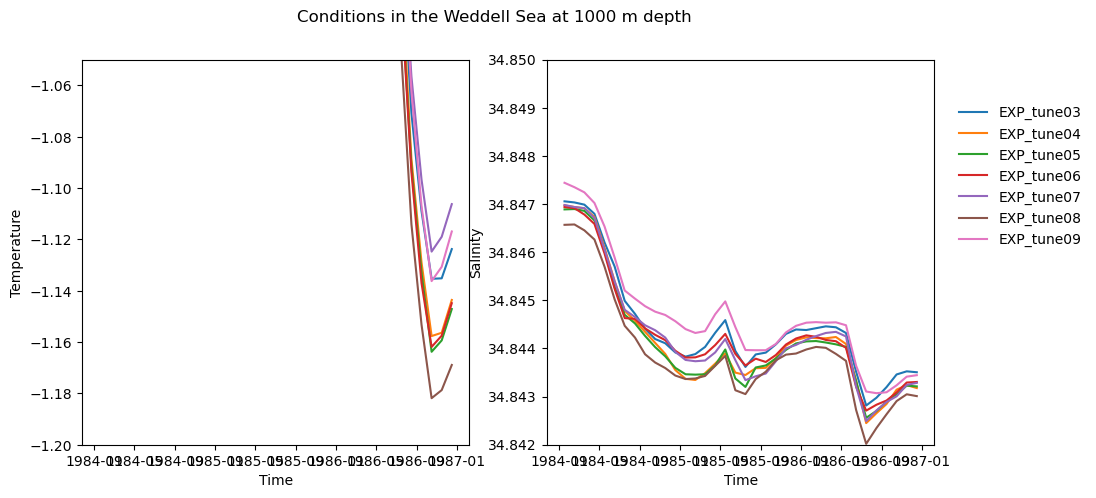

In [66]:
fig, ax = plt.subplots(1,2, figsize=(11,5))

for axis in ax.ravel():
    axis.set_xlabel('Time')

fig.suptitle('Conditions in the Weddell Sea at 1000 m depth')
ax[0].set_ylabel('Temperature')
ax[1].set_ylabel('Salinity')

for exp in EXP:
    thetao_wed = calc_hovmoeller('thetao', weddell_convect, run_folder=f'{base_folder}{exp}/', nemo_mesh=nemo_mesh)
    salt_wed   = calc_hovmoeller('so', weddell_convect, run_folder=f'{base_folder}{exp}/', nemo_mesh=nemo_mesh)

    ax[0].plot(thetao_wed.time_counter, thetao_wed.isel(deptht=78), label=exp)
    ax[1].plot(salt_wed.time_counter, salt_wed.isel(deptht=78), label=exp)

# ax[0].set_ylim(-1.2, -1.05)
# ax[1].set_ylim(34.842, 34.850)
ax[1].legend(frameon=False, loc=(1.05, 0.5))

Tuning experiments:

3. decrease minimum sea ice thickness (0.1 --> 0.05)
4. turn on frazil ice
5. increase minimum sea ice thickness (0.1 --> 0.15) (worse)
6. decrease rn_beta, coef for lateral melting
7. increase rn_beta, coef for lateral meling (worse, but not strong change)
8. decrease rn_cio (5e-3 --> 4e-3), ice ocean drag coefficient (worse, fairly sensitive)
9. increase rn_cio (5e-3 --> 6e-3), ice ocean drag coefficient

100%|██████████| 8/8 [00:25<00:00,  3.20s/it]


Saving /gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/EXP_tune03/hovmoeller-TS-weddell.jpg


100%|██████████| 8/8 [01:03<00:00,  7.88s/it]


Saving /gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/EXP_tune04/hovmoeller-TS-weddell.jpg


100%|██████████| 8/8 [00:52<00:00,  6.56s/it]


Saving /gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/EXP_tune05/hovmoeller-TS-weddell.jpg


100%|██████████| 8/8 [01:05<00:00,  8.18s/it]


Saving /gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/EXP_tune06/hovmoeller-TS-weddell.jpg


100%|██████████| 8/8 [00:53<00:00,  6.72s/it]


Saving /gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/EXP_tune07/hovmoeller-TS-weddell.jpg


100%|██████████| 8/8 [01:34<00:00, 11.84s/it]


Saving /gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/EXP_tune08/hovmoeller-TS-weddell.jpg


100%|██████████| 8/8 [01:02<00:00,  7.83s/it]


Saving /gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/EXP_tune09/hovmoeller-TS-weddell.jpg


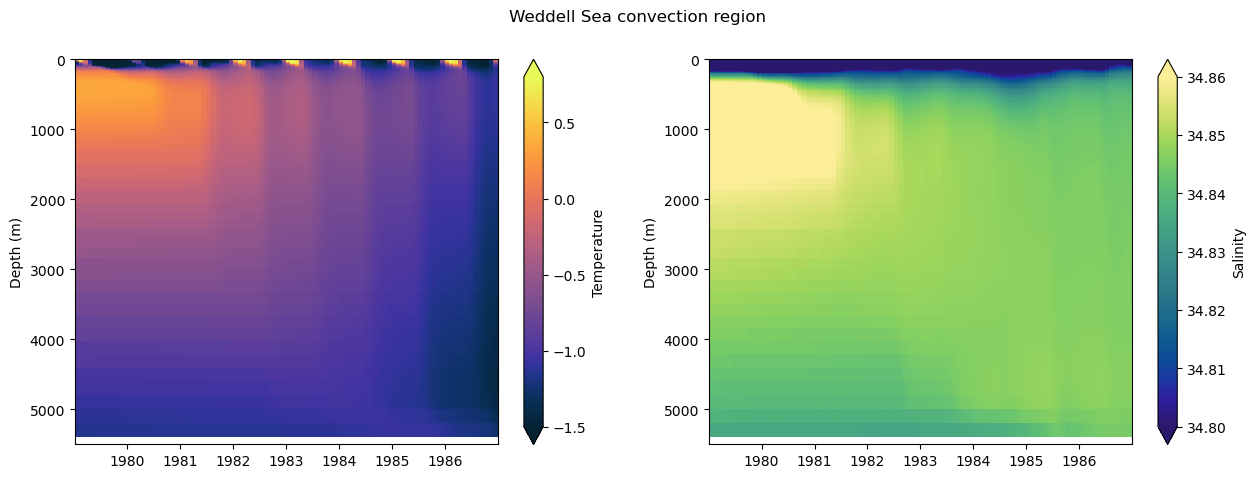

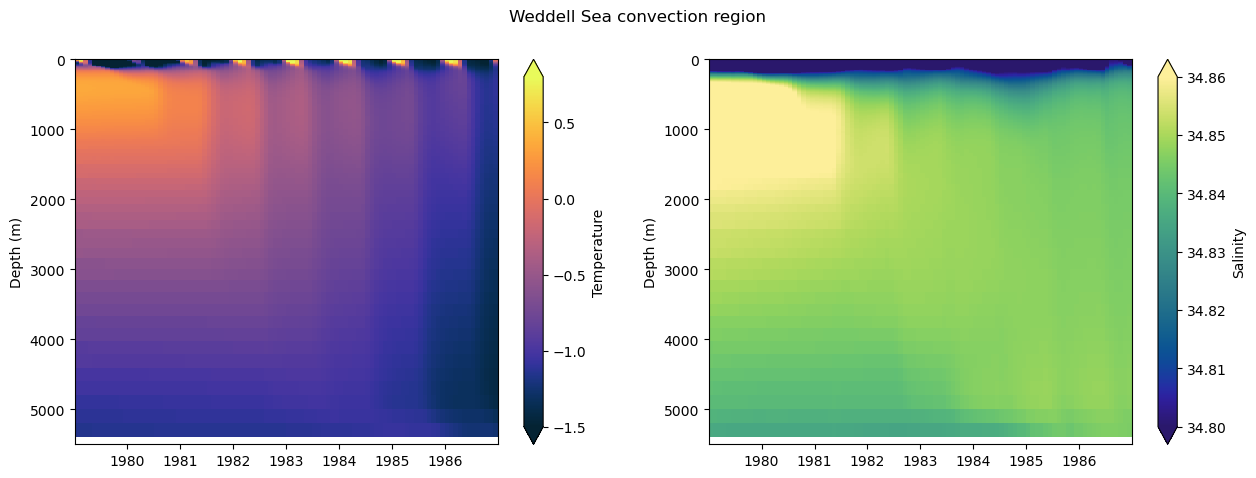

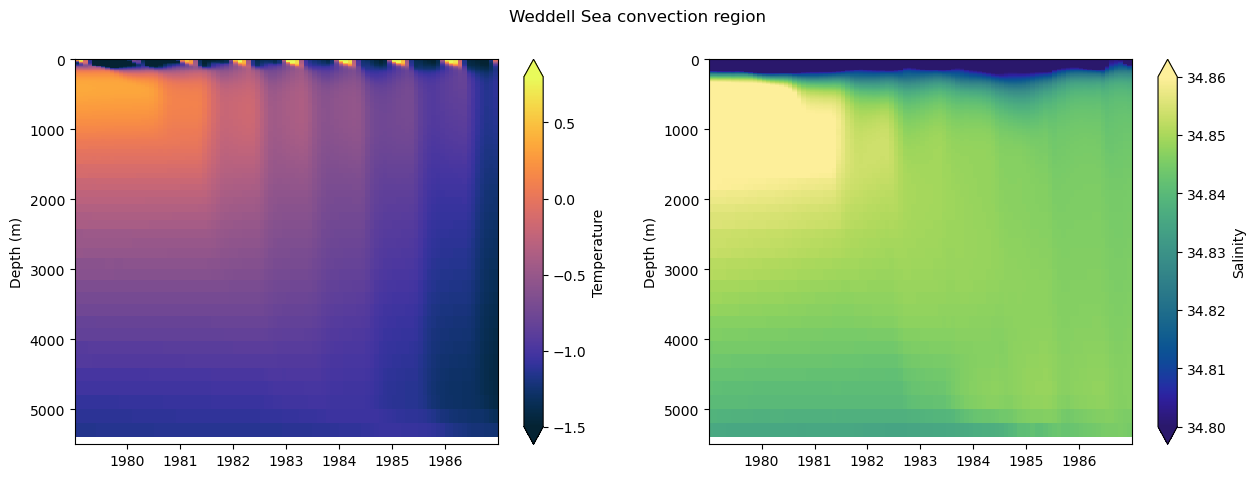

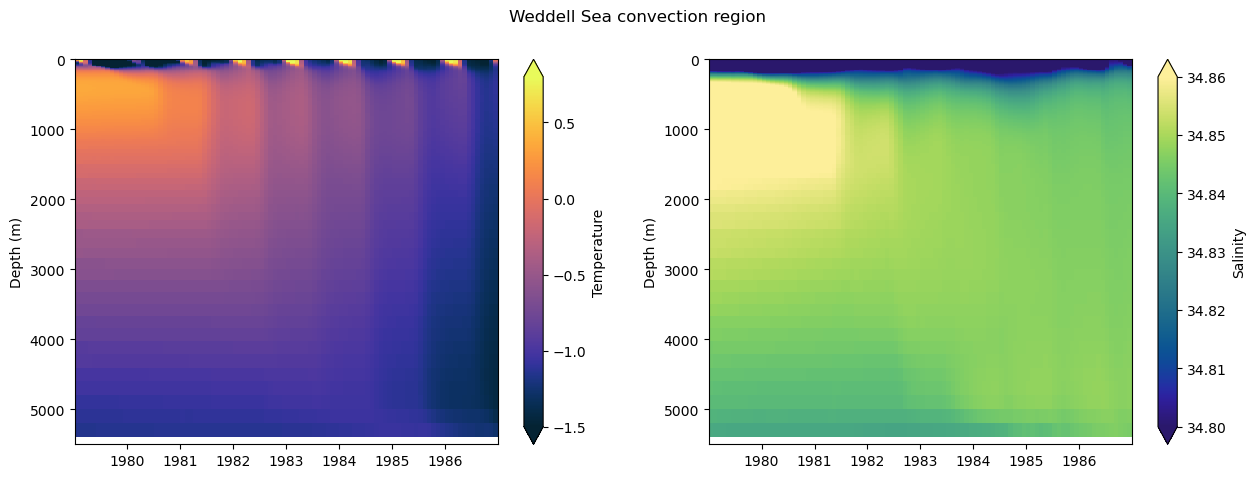

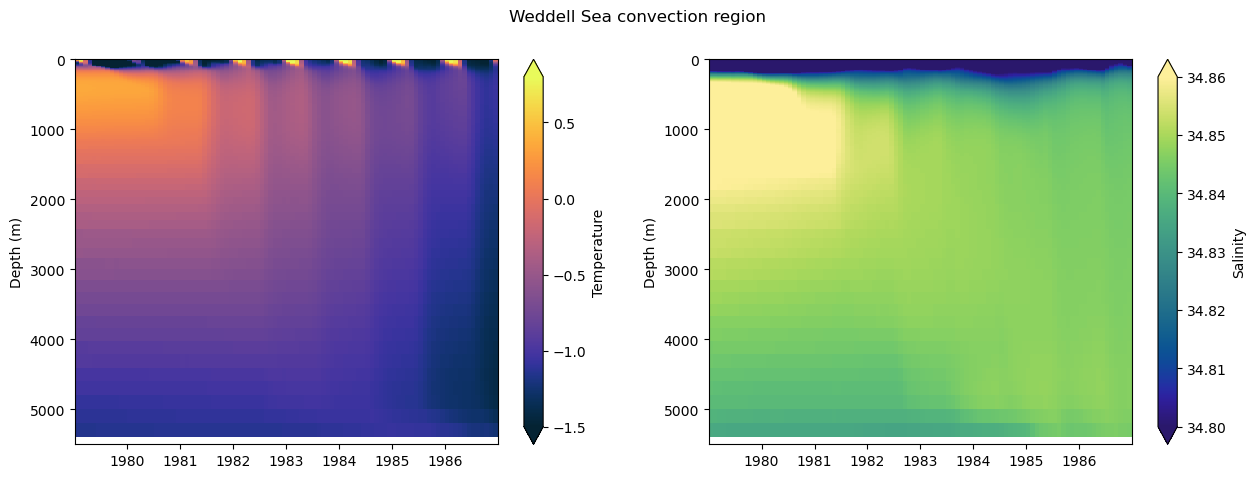

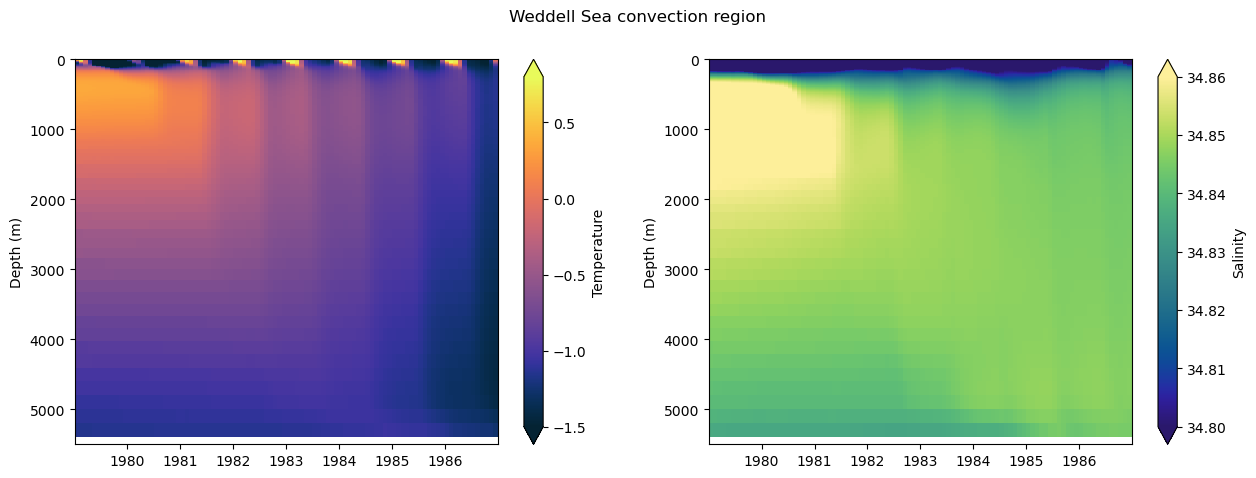

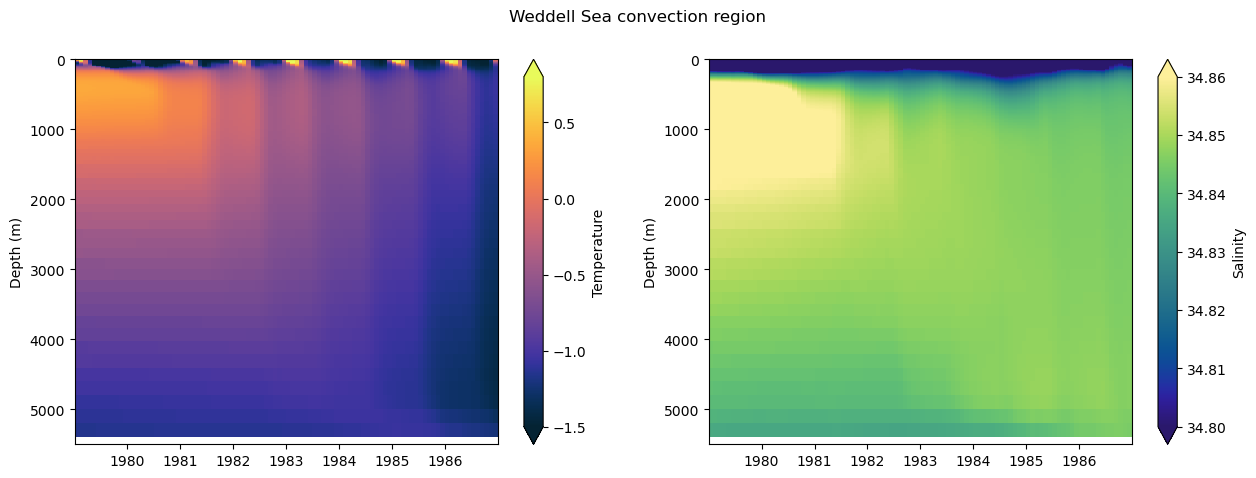

In [40]:
for exp in EXP:
    EXP_folder = f'{base_folder}{exp}/'
    thetao_wed = calc_hovmoeller('thetao', weddell_convect, run_folder=EXP_folder, nemo_mesh=nemo_mesh)
    salt_wed   = calc_hovmoeller('so', weddell_convect, run_folder=EXP_folder, nemo_mesh=nemo_mesh)

    hovmoeller_plot(thetao_wed, salt_wed, title='Weddell Sea convection region', 
                    fig_name=f'{base_folder}{exp}/hovmoeller-TS-weddell.jpg', ylim=(5500,0))

Look at convection regions

In [12]:
# x axis--> time
# y axis--> depth
# location: somewhere where deep convection occurs --> Weddell Sea and also check Ross Gyre region (1989, 1991, 2004, 2006)
# ts.amundsen_sea_bwtemp
weddell_convect = {'x':slice(930,1150), 'y':slice(295,360)}
ross_convect    = {'x':slice(450,580),  'y':slice(220,300)}

In [13]:
# add map of region that I did the hovmoeller over:

In [14]:
# for year in range(1979,2000):
#     data = xr.open_dataset(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/allon-1980/eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc')
#     # data.thetao.isel(time_counter=8)
#     fig, ax = plt.subplots(1,1)
#     data.mldr10_1.isel(time_counter=7, x_grid_T=ross_convect['x'], y_grid_T=ross_convect['y']).plot(ax=ax)

In [15]:
def calc_hovmoeller(var, region, nemo_mesh=nemo_mesh):
    i=0
    nemo_mesh_subset = nemo_mesh.rename({'x':'x_grid_T','y':'y_grid_T','nav_lev':'deptht'}).isel(x_grid_T=region['x'], y_grid_T=region['y'])
    for year in tqdm.tqdm(range(1979,2015)):
        with xr.open_dataset(f'{run_folder}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc').isel(x_grid_T=region['x'], y_grid_T=region['y']) as ds:
            var_ocean  = xr.where(nemo_mesh_subset.tmask.isel(time_counter=0)==0, np.nan, ds[var]) 
            area_ocean = xr.where(nemo_mesh_subset.tmask.isel(time_counter=0)==0, np.nan, ds['area_grid_T']) 
            var_ds     = (var_ocean*area_ocean).sum(dim=['x_grid_T','y_grid_T'])/(area_ocean.sum(dim=['x_grid_T','y_grid_T']))
            if i==0:
                convect_ts = var_ds
            else:
                convect_ts = xr.concat([convect_ts, var_ds], dim='time_counter')
        
        i+=1
    return convect_ts

In [19]:
thetao_wed = calc_hovmoeller('thetao', weddell_convect, nemo_mesh=nemo_mesh)
salt_wed   = calc_hovmoeller('so', weddell_convect, nemo_mesh=nemo_mesh)

100%|██████████| 36/36 [04:20<00:00,  7.23s/it]


In [9]:
thetao_ross = calc_hovmoeller('thetao', ross_convect, nemo_mesh=nemo_mesh)
salt_ross   = calc_hovmoeller('so', ross_convect, nemo_mesh=nemo_mesh)

100%|██████████| 36/36 [08:05<00:00, 13.50s/it]


Saving /gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/allon-1980/hovmoeller-TS-weddell-vmin.jpg


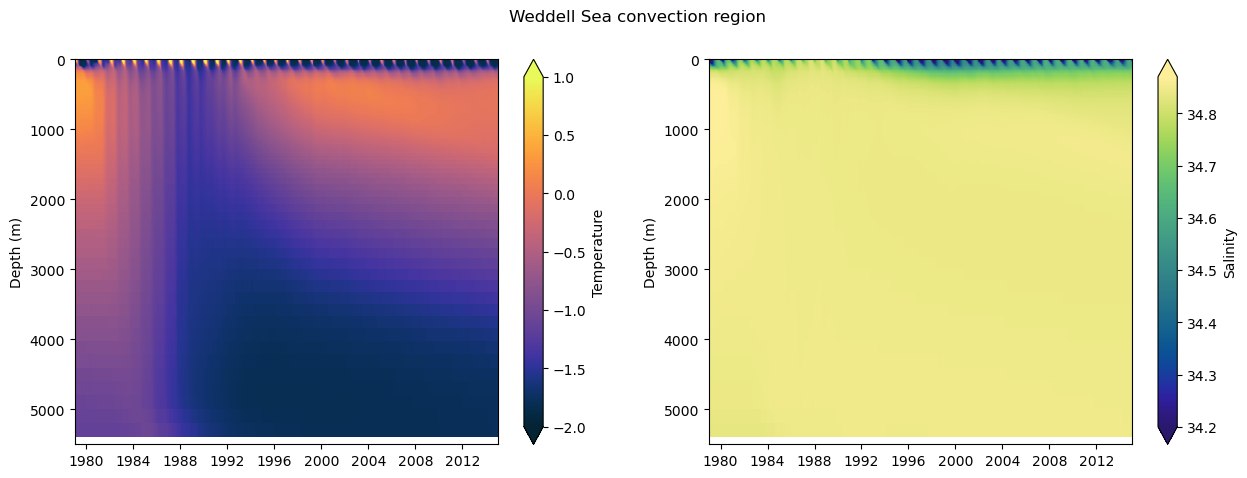

In [36]:
hovmoeller_plot(thetao_wed, salt_wed, title='Weddell Sea convection region', 
                fig_name='/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/allon-1980/hovmoeller-TS-weddell-vmin.jpg')

Saving /gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/allon-1980/hovmoeller-TS-ross.jpg


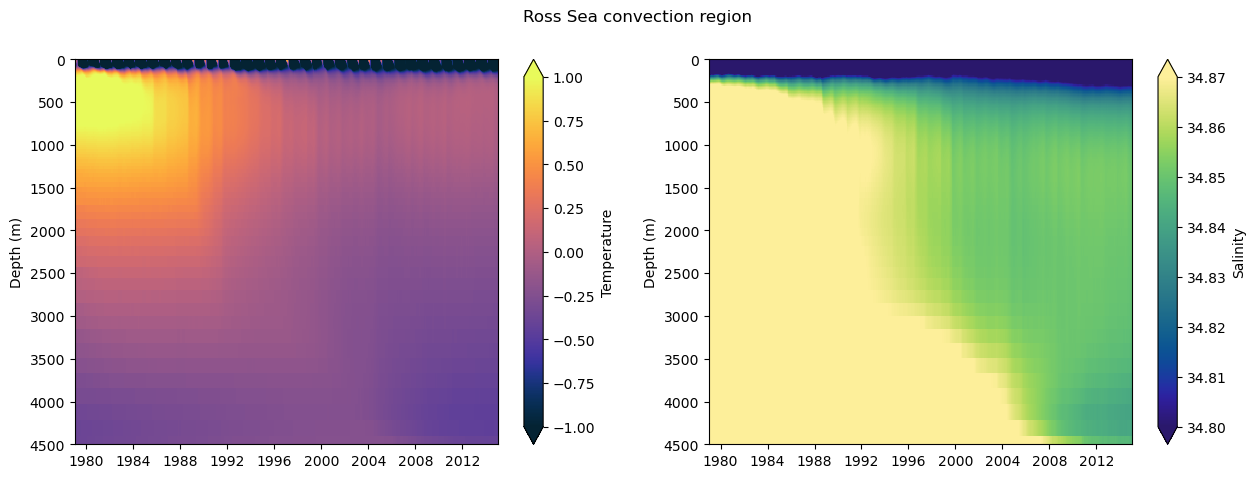

In [16]:
hovmoeller_plot(thetao_ross, salt_ross, title='Ross Sea convection region', ylim=(4500,0),
                fig_name='/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/allon-1980/hovmoeller-TS-ross.jpg')

Saving /gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/allon-1980/hovmoeller-TS-ross-vmin.jpg


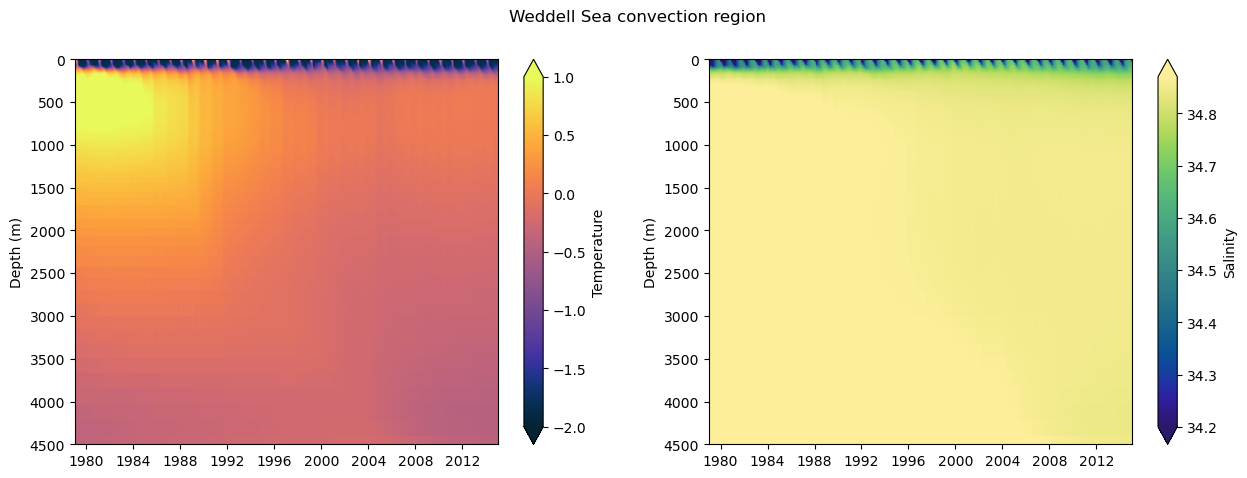

In [19]:
hovmoeller_plot(thetao_ross, salt_ross, title='Weddell Sea convection region', ylim=(4500,0), 
                fig_name='/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/allon-1980/hovmoeller-TS-ross-vmin.jpg')

Saving /gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/allon-1980/hovmoeller-TS-ross-surface.jpg


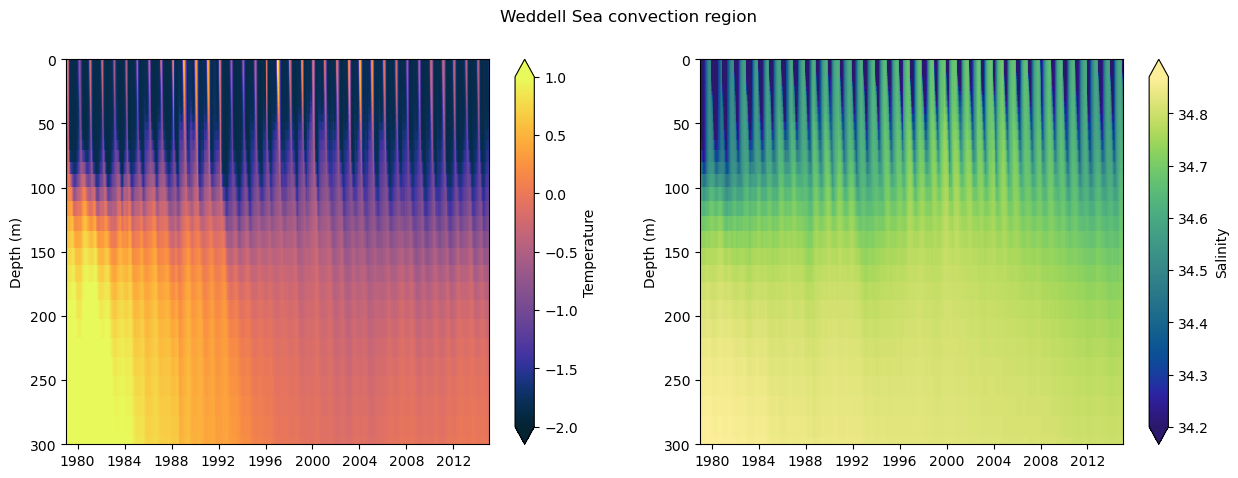

In [22]:
hovmoeller_plot(thetao_ross, salt_ross, title='Weddell Sea convection region', ylim=(300,0),
                fig_name='/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/allon-1980/hovmoeller-TS-ross-surface.jpg')

In [39]:
def hovmoeller_plot(thetao, salt, title=None, fig_size=(15,5), return_fig=False, fig_name=None, ylim=(5500,0), dpi=None):

    fig, ax = plt.subplots(1,2, figsize=fig_size)
    # cm1 = ax[0].pcolormesh(thetao.time_centered, thetao.deptht, thetao, rasterized=True, cmap=cmocean.cm.thermal, vmin=-1, vmax=1)
    # cm2 = ax[1].pcolormesh(salt.time_centered, salt.deptht, salt, rasterized=True, cmap=cmocean.cm.haline, vmin=34.8, vmax=34.87)
    cm1 = ax[0].pcolormesh(thetao.time_centered, thetao.deptht, thetao, rasterized=True, cmap=cmocean.cm.thermal, vmin=-1.5, vmax=0.8)
    cm2 = ax[1].pcolormesh(salt.time_centered, salt.deptht, salt, rasterized=True, cmap=cmocean.cm.haline, vmin=34.8, vmax=34.86)
    fig.colorbar(cm1, ax=ax[0], label='Temperature', extend='both')
    fig.colorbar(cm2, ax=ax[1], label='Salinity', extend='both')
    for axis in ax.ravel():
        axis.invert_yaxis()
        axis.set_ylabel('Depth (m)')
        axis.set_ylim(ylim[0],ylim[1])

    if title is not None:
        fig.suptitle(title)
    if fig_name is not None:
        finished_plot(fig, fig_name=fig_name, dpi=dpi)
    if return_fig:
        return fig, ax
    else:
        return

For TS diagrams, have a look at this one: https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2007RG000250

In [9]:
region = weddell_convect
nemo_mesh_subset = nemo_mesh.rename({'x':'x_grid_T','y':'y_grid_T','nav_lev':'deptht'}).isel(x_grid_T=region['x'], y_grid_T=region['y'])

for year in range(1996,2015):
    data   = xr.open_dataset(f'{run_folder}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc').isel(x_grid_T=region['x'], y_grid_T=region['y'])
    T = xr.where(nemo_mesh_subset.tmask.isel(time_counter=0)==0, np.nan, data.thetao)
    S = xr.where(nemo_mesh_subset.tmask.isel(time_counter=0)==0, np.nan, data.so)
    for month in range(1,13):
        fig, ax = plt.subplots(1,1, figsize=(8,8))
        # sns.kdeplot(x=S.values.flatten(),y=T.values.flatten())
        sns.histplot(x=S.isel(time_counter=month-1).values.flatten(),
                     y=T.isel(time_counter=month-1).values.flatten(), ax=ax, bins=1000)
        ax.set_xlim(34.0,34.9)
        ax.set_ylim(-2.0, 1.5)
        ax.set_xlabel('Absolute Salinity')
        ax.set_ylabel('Conservative Temperature')
        ax.set_title(f'Weddell Sea convection region {year}-{month:02}')
        fig.savefig(f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/allon-1980/temp/TS-weddell-y{year}m{month:02}.jpg', bbox_inches='tight')
        plt.close()

In [26]:
filenames=np.sort(glob.glob(f'{run_folder}temp/TS-weddell-y????m??.jpg'))
create_animation(filenames, out_file=f'{run_folder}TS-weddell-convection.mp4')

/tmp/ipykernel_3448/713629286.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (718, 699) to (720, 704) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x61c6080] Warning: data is not aligned! This can lead to a speed loss


In [9]:
# Plot a Hovmoller plot of the given 2D data field.

# Arguments:
# data: 2D array of data (time x defig, ax = plt.subplots(1,2, figsize=(15,5))
    cm1 = ax[0].pcolormesh(thetao_wed.time_centered, thetao_wed.deptht, thetao_wed, rasterized=True, cmap=cmocean.cm.thermal, vmin=-1, vmax=1)
    cm2 = ax[1].pcolormesh(salt_wed.time_centered, salt_wed.deptht, salt_wed, rasterized=True, cmap=cmocean.cm.haline, vmin=34.8, vmax=34.87)
    fig.colorbar(cm1, ax=ax[0], label='Temperature', extend='both')
    fig.colorbar(cm2, ax=ax[1], label='Salinity', extend='both')
    fig.suptitle('Weddell Sea convection region')
    for axis in ax.ravel():
        axis.invert_yaxis()
        axis.set_ylabel('Depth (m)')
        axis.set_ylim(5500,0)pth). Assumes it is not on the w-grid.
# time: array of Date objects corresponding to time axis.
# grid: Grid object.

# Optional keyword arguments:
# smooth: window for moving average (0 means no smoothing)
# ax, make_cbar, ctype, vmin, vmax, title, titlesize, return_fig, fig_name, extend, fig_size, dpi: as in latlon_plot
# zmin, zmax: bounds on depth axis to plot (negative, in metres, zmin is the deep bound).
# monthly: as in netcdf_time
# contours: list of values to contour in black over top

def hovmoller_plot (data, time, grid, smooth=0, ax=None, make_cbar=True, ctype='basic', 
                    vmin=None, vmax=None, zmin=None, zmax=None, monthly=True, contours=None, 
                    date_since_start=False, start=0, val0=None, title=None, titlesize=18, 
                    return_fig=False, fig_name=None, extend=None, figsize=(14,5), dpi=None, start_t=None, end_t=None, rasterized=False):

    # Choose what the endpoints of the colourbar should do
    if extend is None:
        extend = get_extend(vmin=vmin, vmax=vmax)

    if monthly:
        # As in netcdf_time, the time axis will have been corrected so it is
        # marked with the beginning of each month. So to get the boundaries of
        # each time index, we just need to add one month.
        if time[-1].month == 12:
            end_time = datetime.datetime(time[-1].year+1, 1, 1)
        else:
            end_time = datetime.datetime(time[-1].year, time[-1].month+1, 1)
        time_edges = np.concatenate((time, [end_time]))
    else:
        # Following MITgcm convention, the time axis will be stamped with the
        # first day of the next averaging period. So to get the boundaries of
        # each time index, we just need to extrapolate to the beginning,
        # assuming regularly spaced time intervals.
        dt = time[1]-time[0]
        start_time = time[0] - dt
        time_edges = np.concatenate(([start_time], time))
        
    if date_since_start:
        time_years = [t.year + t.month/12. for t in time_edges]
        time_edges = np.array([t - time_years[start] for t in time_years])

    # Smooth with a moving average
    data, time_edges = moving_average(data, smooth, time=time_edges)
    
    # If we're zooming, we need to choose the correct colour bounds
    if any([zmin, zmax]):
        vmin_tmp, vmax_tmp = var_min_max_zt(data, grid, zmin=zmin, zmax=zmax)
        if vmin is None:
            vmin = vmin_tmp
        if vmax is None:
            vmax = vmax_tmp
    # Get colourmap
    cmap, vmin, vmax = set_colours(data, ctype=ctype, vmin=vmin, vmax=vmax, val0=val0)

    if start_t is None:
        start_t = time_edges[0]
    if end_t is None:
        end_t = time_edges[-1]

    # Make the figure and axes, if needed
    existing_ax = ax is not None
    if not existing_ax:
        fig, ax = plt.subplots(figsize=figsize)

    # Plot the data
    img = ax.pcolormesh(time_edges, grid.z_edges, np.transpose(data), cmap=cmap, vmin=vmin, vmax=vmax, rasterized=rasterized)
    if contours is not None:
        # Overlay contours
        # Need time at the centres of each index
        # Have to do this with a loop unfortunately
        time_centres = []
        for t in range(time_edges.size-1):
            dt = (time_edges[t+1]-time_edges[t])/2
            time_centres.append(time_edges[t]+dt)
        plt.contour(time_centres, grid.z, np.transpose(data), levels=contours, colors='black', linestyles='solid')

    # Set depth limits
    if zmin is None:
        # Index of last masked cell
        k_bottom = np.argwhere(np.invert(data[0,:].mask))[-1][0]
        zmin = grid.z_edges[k_bottom+1]
    if zmax is None:
        # Index of first unmasked cell
        k_top = np.argwhere(np.invert(data[0,:].mask))[0][0]
        zmax = grid.z_edges[k_top]    
    ax.set_ylim([zmin, zmax])
    ax.set_xlim([start_t, end_t])
    # Make nice axes labels
    depth_axis(ax)
    if make_cbar:
        # Add a colourbar
        plt.colorbar(img, extend=extend)
    if title is not None:
        # Add a title
        plt.title(title, fontsize=titlesize)

    if return_fig:
        return fig, ax
    elif existing_ax:
        return img
    else:
        finished_plot(fig, fig_name=fig_name, dpi=dpi)

In [ ]:
for var in var_names:
    timeseries_by_region(var, '/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/allon-1980',
                         regions=regions, colours=colours, timeseries_file='timeseries.nc', smooth=0, 
                         fig_name=f'/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/allon-1980/timeseries-{var}.jpg', 
                         linewidth=2)import cartopy

Also look at:
- SSH drift in full domain
- T, S thermocline drift

In [23]:
profiles = xr.open_dataset(f'{run_folder}timeseries-profiles.nc')

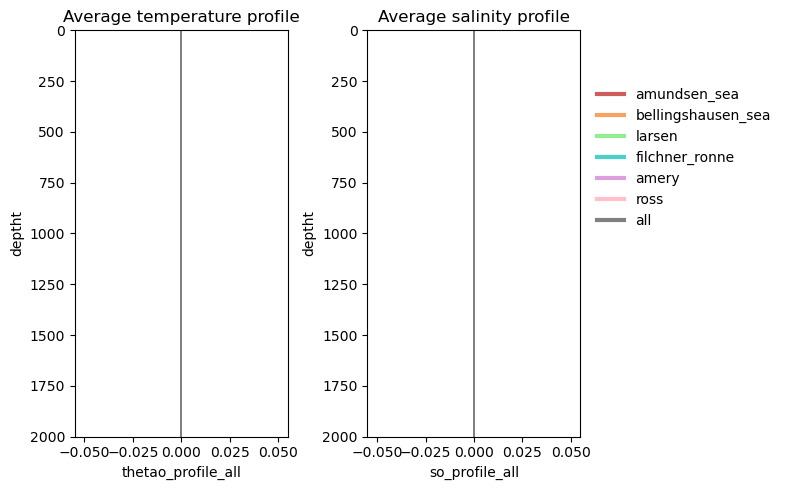

In [24]:
fig, ax = plt.subplots(1,2, figsize=(8,5))

for i, name in enumerate(['amundsen_sea','bellingshausen_sea','larsen','filchner_ronne','ross','amery','all']):
    for time in profiles[f'thetao_profile_{name}'].time_counter:
        profiles[f'thetao_profile_{name}'].sel(time_counter=time).plot(y='deptht', ax=ax[0], color=colours[i], linewidth=0.3)
        profiles[f'so_profile_{name}'].sel(time_counter=time).plot(y='deptht', ax=ax[1], color=colours[i], linewidth=0.3)

for axis in ax.ravel():
    axis.invert_yaxis()
    axis.set_ylim(2000,0)

ax[0].set_title('Average temperature profile')
ax[1].set_title('Average salinity profile')

custom_lines=[]
for colour in colours:
    custom_lines = custom_lines + [Line2D([0], [0], color=colour, lw=3)]
    ax[1].legend(custom_lines, regions, frameon=False, loc=(1.05, 0.5))
    
fig.tight_layout()
# ax[1].plot(ts_amundsen_bwalt)

In [25]:
cmap   = cmocean.cm.haline
colors = cmap(np.linspace(0,1,len(profiles[f'thetao_profile_{name}'].time_counter)))

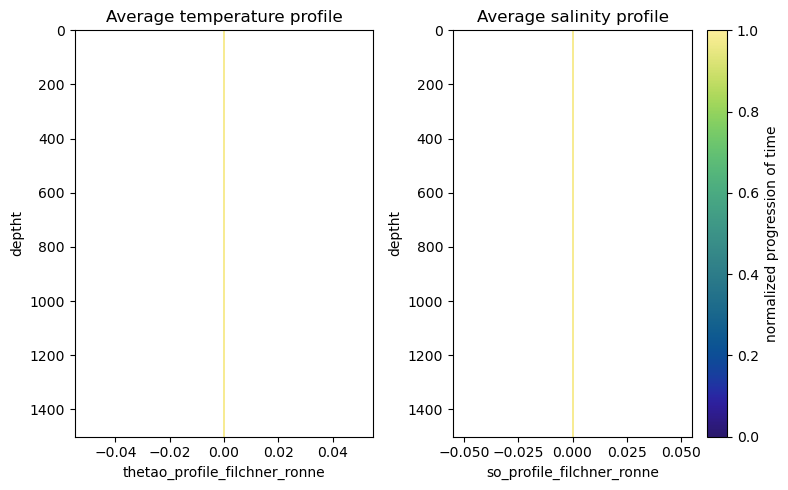

In [26]:
fig, ax = plt.subplots(1,2, figsize=(8,5))

name='filchner_ronne'
for i, time in enumerate(profiles[f'thetao_profile_{name}'].time_counter):
    profiles[f'thetao_profile_{name}'].sel(time_counter=time).plot(y='deptht', ax=ax[0], color=colors[i], linewidth=0.3)
    profiles[f'so_profile_{name}'].sel(time_counter=time).plot(y='deptht', ax=ax[1], color=colors[i], linewidth=0.3)

for axis in ax.ravel():
    axis.invert_yaxis()
    axis.set_ylim(1500,0)

ax[0].set_title('Average temperature profile')
ax[1].set_title('Average salinity profile')

sm = plt.cm.ScalarMappable(cmap=cmap)
plt.colorbar(sm, label='normalized progression of time')
# custom_lines=[]
# for colour in colours:
#     custom_lines = custom_lines + [Line2D([0], [0], color=colour, lw=3)]
#     ax[1].legend(custom_lines, regions, frameon=False, loc=(1.05, 0.5))
    
fig.tight_layout()
# ax[1].plot(ts_amundsen_bwalt)

In [4]:
year=1979thetao_ds.deptht
df = xr.open_dataset(f'{run_folder}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc')

In [ ]:
var   = 'mldr10_1' #'siconc'
for year in range(2014,2015):
    ds = xr.open_dataset(f'{run_folder}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc')
    for month in range(1,13):
        fig, ax = plt.subplots(1,1, figsize=(10,8))
        circumpolar_plot(ds[var].isel(time_counter=month-1), nemo_mesh.isel(time_counter=0), ax=ax,
                         make_cbar=True, return_fig=False, ctype='viridis', lat_max=-50, vmin=0, vmax=1000, title=f'{var} {year}-{month:02}')
        fig.tight_layout()
        finished_plot(fig, fig_name=f'{run_folder}temp/{var}-y{year}m{month:02}.jpg')
        plt.close()

In [7]:
filenames=np.sort(glob.glob(f'{run_folder}temp/{var}-y????m??.jpg'))
create_animation(filenames, out_file=f'{run_folder}circumpolar-{var}.mp4')

/tmp/ipykernel_3291/713629286.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 800) to (1008, 800) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x61ecd00] Warning: data is not aligned! This can lead to a speed loss


Create file containing region masks

In [7]:
def create_regions_file(nemo_mesh, option, out_file):

    ds = xr.Dataset(
        coords={'nav_lon':(["y","x"], nemo_mesh.nav_lon.values),
                'nav_lat':(["y","x"], nemo_mesh.nav_lat.values)})
    
    masks={}
    # later should be for name in region_names
    for name in ['amundsen_sea','bellingshausen_sea','larsen','filchner_ronne','ross', 'amery', 'all']: 
        mask, _, region_name = region_mask(name, nemo_mesh, option=option, return_name=True) 
        masks[name] = mask 
        ds = ds.assign({f'mask_{name}':(["y","x"], masks[name].values)})   
    
    ds.to_netcdf(out_file)
    
    return ds

In [ ]:
create_regions_file(nemo_mesh, 'all'   , '/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/regions_all.nc')
create_regions_file(nemo_mesh, 'shelf' , '/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/regions_shelf.nc')
create_regions_file(nemo_mesh, 'cavity', '/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/regions_cavity.nc')

# Animations etc.

In [ ]:
# To make circular maps:
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

In [4]:
def prepare_plot(figsize=(15, 8)):
    """This function returns prepared axes for the polar plot.
    
    Usage:
        fig, ax = prepare_plot()
    """
    fig, ax = plt.subplots(1,2, figsize=figsize, subplot_kw={'projection': ccrs.SouthPolarStereo()})
    for axis in ax.ravel():
        axis.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
        axis.set_boundary(map_circle, transform=axis.transAxes)
        # ax.coastlines(); 
        gl = axis.gridlines(draw_labels=True, ylocs=[]);#, color='w', lw=2);
    return fig, ax

In [5]:
# tmask = np.ma.masked_where(mesh.tmask.values==0, mesh.tmask.values)

In [20]:
def amundsen_frame(fileT_ini, var, month, path):
    depth_ind = [0, 18, 35]
    fileT    = fileT_ini.isel(x_grid_T=slice(500, 900), y_grid_T=slice(150,350))thetao_ds.deptht
    mesh_sub = mesh.isel(x=slice(500, 900), y=slice(150,350))
    
    # --------- figure -------------------------------------------------------------
    fig  = plt.figure(figsize=(18,8))
    date = fileT_ini.time_counter.isel(time_counter=month-1).dt.strftime('%Y-%m').values
    fig.suptitle(f"{str(date)}")
    gs = fig.add_gridspec(3,5)
    
    ax1 = fig.add_subplot(gs[0, 0:3], projection=ccrs.Mercator(latitude_true_scale=-70))
    ax2 = fig.add_subplot(gs[1, 0:3], projection=ccrs.Mercator(latitude_true_scale=-70))
    ax3 = fig.add_subplot(gs[2, 0:3], projection=ccrs.Mercator(latitude_true_scale=-70))
    ax4 = fig.add_subplot(gs[:, 3]) # temperature
    ax5 = fig.add_subplot(gs[:, 4]) # salinity
    
    vm = [(-2.5, 2.5),(-2.5,2.5),(-2.5,2.5)] # colorbar limits
    # vm = [(31, 34.5),(31,34.5),(34.4,35)] # colorbar limits
    # Coordinates of 'stations'
    i1, i2 = (249, 715) # on Amundsen shelf
    s1, s2 = (271, 711) # Amundsen shelf break
    o1, o2 = (281, 711) # off Amundsen slope
    lon    = mesh.nav_lon.values
    lat    = mesh.nav_lat.values
    
    # --- Maps ---
    kwags1  = {'transform':ccrs.PlateCarree(), 'cmap':cmocean.cm.balance, 'rasterized':True}
    for i, axis in enumerate([ax1, ax2, ax3]):
        axis.set_extent([-80, -140, -75.5, -68], ccrs.PlateCarree())
        axis.set_title(f'{fileT[var].long_name}, depth: {mesh.nav_lev.values[depth_ind[i]]:.1f} m')
        lon_plot = np.ma.masked_where(mesh_sub.tmask.isel(nav_lev=depth_ind[i]) == 0, fileT.nav_lon_grid_T.values)
        lat_plot = np.ma.masked_where(mesh_sub.tmask.isel(nav_lev=depth_ind[i]) == 0, fileT.nav_lat_grid_T.values)
        plot_var = np.ma.masked_where(mesh_sub.tmask.isel(nav_lev=depth_ind[i]) == 0, fileT[var].isel(time_counter=month-1, deptht=depth_ind[i]).values)
        cm = axis.pcolormesh(lon_plot, lat_plot, plot_var, vmin=vm[i][0], vmax=vm[i][1], **kwags1)
    
        # mark shelf break with dashed line
        axis.contour(fileT.nav_lon_grid_T, fileT.nav_lat_grid_T, mesh_sub.bathy_metry, [1200], 
                     linestyles='--', linewidths=0.8, colors='k', transform=ccrs.PlateCarree(), zorder=3)
    
        stn_kwags = {'transform':ccrs.PlateCarree(), 'marker':'*', 's':90, 'zorder':3, 'edgecolors':'k', 'linewidths':0.6}
        axis.scatter([lon[i1,i2], lon[i1,i2]], [lat[i1,i2], lat[i1,i2]], **stn_kwags)
        axis.scatter([lon[s1,s2], lon[s1,s2]], [lat[s1,s2], lat[s1,s2]], **stn_kwags)
        axis.scatter([lon[o1,o2], lon[o1,o2]], [lat[o1,o2], lat[o1,o2]], **stn_kwags)
        CB1 = fig.colorbar(cm, ax=axis, fraction=0.04)

        gl = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
        gl.top_labels = False; gl.right_labels = False;
        gl.xlines = False; gl.ylines = False;
        
    # --- profiles ---
    ax4.set_xlim(-2.5, 2.5)
    ax5.set_xlim(32.5, 35)
    vars = ['thetao', 'so']
    for i, axis in enumerate([ax4, ax5]):
        axis.invert_yaxis()
        axis.set_ylim(600, 0)
        plot1 = xr.where(fileT_ini[vars[i]].isel(time_counter=month-1, y_grid_T=i1, x_grid_T=i2) == 0, np.nan, 
                         fileT_ini[vars[i]].isel(time_counter=month-1, y_grid_T=i1, x_grid_T=i2))
        plot2 = xr.where(fileT_ini[vars[i]].isel(time_counter=month-1, y_grid_T=s1, x_grid_T=s2) == 0, np.nan, 
                         fileT_ini[vars[i]].isel(time_counter=month-1, y_grid_T=s1, x_grid_T=s2))
        plot3 = xr.where(fileT_ini[vars[i]].isel(time_counter=month-1, y_grid_T=o1, x_grid_T=o2) == 0, np.nan, 
                         fileT_ini[vars[i]].isel(time_counter=month-1, y_grid_T=o1, x_grid_T=o2))
        axis.set_title(fileT_ini[vars[i]].long_name)
        axis.plot(plot1, mesh.nav_lev, label='Shelf')
        axis.plot(plot2, mesh.nav_lev, label='Shelf break')
        axis.plot(plot3, mesh.nav_lev, label='Open ocean')
        
        for di in depth_ind:
            axis.plot([-10, 40],[mesh.nav_lev.values[di], mesh.nav_lev.values[di]], '--k')
        axis.set_ylabel('Depth (m)')
        axis.legend(frameon=False, loc=(0.1, 0.05), fontsize=12)
    
    fig.tight_layout()
    fig.savefig(f'{path}amundsen_{var}_y{str(date)[:-3]}m{month:02}.jpg', bbox_inches='tight')
    plt.close(fig)
    return

In [17]:
mesh = xr.open_dataset('/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/bathymetry/mesh_mask-20240201.nc').isel(time_counter=0)

In [21]:
var='so'

run_path  = '/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/allon-1980/'
for year in range(1979,2011):
    fileT = xr.open_dataset(run_path + f'eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc')
    for month in range(1,13):
        amundsen_frame(fileT, var, month, run_path+'temp/')

# filenames=glob.glob(f'{run_path}temp/amundsen_{var}_y????m??.jpg')

# create_animation(filenames, out_file=f'{run_path}amundsen-so.mp4')

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(18,10), subplot_kw={'projection': ccrs.Mercator(latitude_true_scale=-70)})

for axis in ax.ravel():
    axis.set_extent([-90, -160, -78, -64], ccrs.PlateCarree())
    cs = axis.contour(SOSE_sal_jan.XC, SOSE_sal_jan.YC, SOSE_sal_jan.Depth, levels=[1000, 2000], 
                      colors='w', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())
    gl = axis.gridlines(draw_labels=True);
    gl.xlines=None; gl.ylines=None; gl.top_labels=None; gl.right_labels=None;
    
cm1 = ax[0,0].pcolormesh(WOA_sal.lon, WOA_sal.lat, WOA_sal.s_an.isel(time=0), 
                             transform=ccrs.PlateCarree(), vmin=31, vmax=34)
# CB1 = fig.colorbar(cm1, ax=ax[0,0], fraction=0.03, label='Sea water salinity at standard depths (g/kg)')